In [72]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import time

from collections import defaultdict
from scipy.stats.stats import pearsonr

import operator, statistics
from statistics import mean
import matplotlib.patches as mpatches
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA # for PCA calculation

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

%matplotlib inline

%config InlineBackend.print_figure_kwargs={'facecolor' : "w"} # Make sure the axis background of plots is white, this is usefull for the black theme in JupyterLab
sns.set()

In [46]:
df=pd.read_pickle("files/recofill_tb_timeseriesdata.pkl")

In [52]:
df

,ch1,ch2,ch3,ch4,ch5,ch7,ch8,ch9,ch10,ch11,...,ch41,ch42,ch43,ch44,ch45,ch46,ch47,ch48,ch50,ch52
utctimestamp,,,,,,,,,,,,,,,,,,,,,
2021-06-07 20:52:31,0.942494,0.981132,0.989346,0.978547,0.983654,0.896577,0.999102,0.997465,0.998790,0.203391,...,0.824181,0.999347,0.996723,0.973526,0.168676,0.481819,0.387325,0.565495,0.992600,0.000001
2021-06-07 20:52:32,0.942494,0.981132,0.987823,0.979467,0.986378,0.900978,0.998857,0.996901,0.998521,0.203391,...,0.819517,0.998938,0.996442,0.973604,0.168676,0.481819,0.387325,0.565495,0.994450,0.000001
2021-06-07 20:52:33,0.941748,0.981132,0.987823,0.979467,0.986378,0.896944,0.998857,0.997465,0.997983,0.203391,...,0.823365,0.998530,0.996162,0.974227,0.168676,0.481819,0.387325,0.565495,0.989971,0.000001
2021-06-07 20:52:34,0.941748,0.981132,0.989346,0.979467,0.986378,0.896455,0.999102,0.996808,0.998319,0.203391,...,0.824298,0.999102,0.995974,0.973371,0.168676,0.481819,0.387325,0.565495,0.994742,0.000001
2021-06-07 20:52:35,0.941748,0.981132,0.992390,0.978547,0.988422,0.894621,0.999184,0.996995,0.998588,0.203391,...,0.831293,0.999102,0.996349,0.973449,0.168676,0.481819,0.387325,0.565495,0.991042,0.000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-15 06:20:35,0.870052,0.985849,0.996956,0.969200,0.982973,0.879462,0.999184,0.925446,0.682714,0.338984,...,0.861957,0.999183,0.996255,0.852137,0.168676,0.490910,0.982394,0.971246,0.334178,1.000000
2021-06-15 06:20:36,0.870052,0.985849,0.986301,0.970120,0.982973,0.878729,0.999265,0.925822,0.683386,0.338984,...,0.865687,0.998938,0.996442,0.851826,0.168676,0.490910,0.982394,0.971246,0.334762,1.000000
2021-06-15 06:20:37,0.870052,0.985849,0.992390,0.969200,0.983654,0.877139,0.998367,0.926479,0.683454,0.338984,...,0.866270,0.998448,0.996723,0.852293,0.180724,0.490910,0.982394,0.971246,0.335541,1.000000


Text(0, 0.5, 'cumulative explained variance')

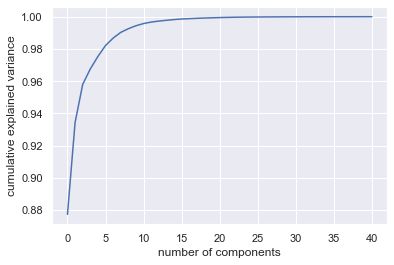

In [53]:
pca = PCA()
X_pca = pca.fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [55]:
df_features=df

In [56]:
num_components = 16
pca = PCA(num_components)
X_pca = pca.fit_transform(df_features) # fit and reduce dimension
n_pcs = pca.n_components_ # get number of component
# get the index of the most important feature on EACH component
most_important = [np.abs(pca.components_[i]).argmax() for i in
range(n_pcs)]
intial_feature_names = df_features.columns
# get the most important feature names
most_important_feature_names = [intial_feature_names[most_important[i]]
for i in range(n_pcs)]
most_important_feature_names

['ch8',
 'ch52',
 'ch29',
 'ch13',
 'ch22',
 'ch22',
 'ch15',
 'ch11',
 'ch15',
 'ch35',
 'ch43',
 'ch32',
 'ch27',
 'ch45',
 'ch11',
 'ch36']

In [63]:
from sklearn.decomposition import IncrementalPCA
ipca = IncrementalPCA(n_components = 16)
X_ipca = ipca.fit_transform(df_features)
print(ipca.n_components_)
pd.DataFrame(ipca.components_, columns = df_features.columns)
n_pcs_ipca = ipca.n_components_
most_important_ipca = [np.abs(ipca.components_[i]).argmax() for i in range(n_pcs_ipca)]
initial_feature_names = df_features.columns
#get most important feature names
most_important_feature_names_ipca = [initial_feature_names[most_important_ipca[i]]
for i in range(n_pcs_ipca)]
most_important_feature_names_ipca

16


['ch8',
 'ch52',
 'ch29',
 'ch13',
 'ch22',
 'ch22',
 'ch15',
 'ch11',
 'ch15',
 'ch35',
 'ch43',
 'ch32',
 'ch27',
 'ch45',
 'ch50',
 'ch29']

In [67]:
np.union1d(most_important_feature_names, most_important_feature_names_ipca).shape

(14,)

In [68]:
df_features=df_features[np.union1d(most_important_feature_names, most_important_feature_names_ipca)]

In [69]:
df_features.to_pickle("files/rewinder_after_pca_no_variables_names.pkl")

In [71]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 540963 entries, 2021-06-07 20:52:31 to 2021-06-15 06:20:39
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ch11    540963 non-null  float64
 1   ch13    540963 non-null  float64
 2   ch15    540963 non-null  float64
 3   ch22    540963 non-null  float64
 4   ch27    540963 non-null  float64
 5   ch29    540963 non-null  float64
 6   ch32    540963 non-null  float64
 7   ch35    540963 non-null  float64
 8   ch36    540963 non-null  float64
 9   ch43    540963 non-null  float64
 10  ch45    540963 non-null  float64
 11  ch50    540963 non-null  float64
 12  ch52    540963 non-null  float64
 13  ch8     540963 non-null  float64
dtypes: float64(14)
memory usage: 61.9 MB


In [76]:
df=df_features

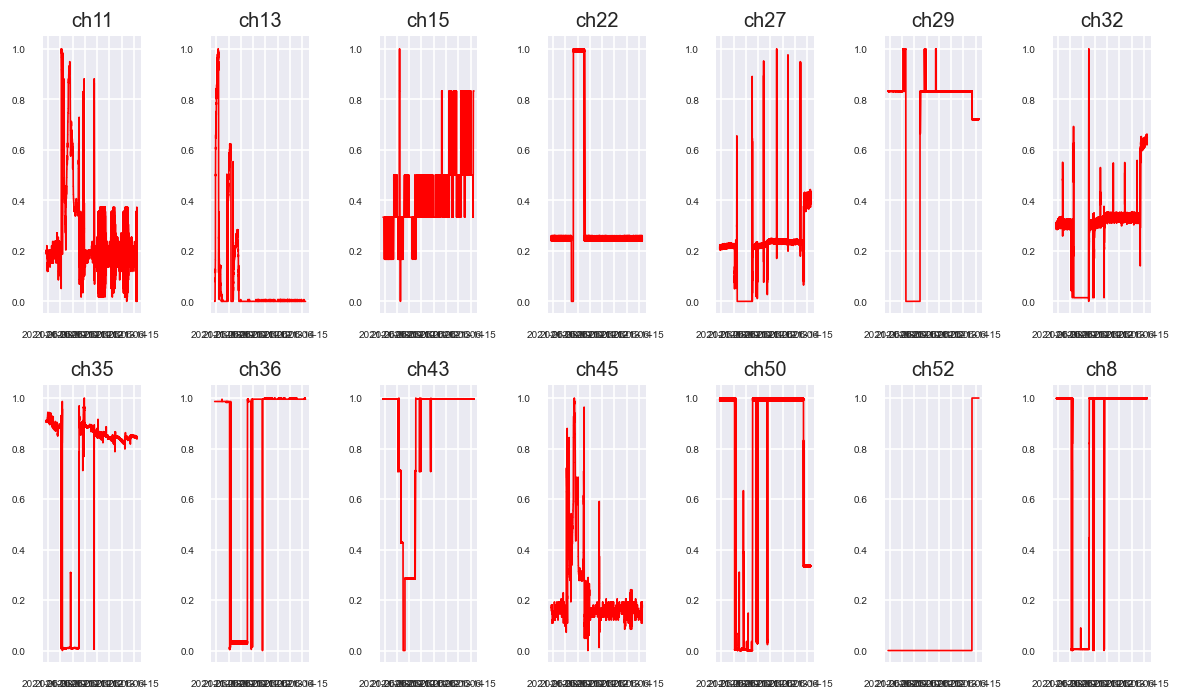

In [79]:
# Plot
fig, axes = plt.subplots(nrows=2, ncols=7, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [1]:
"""from statsmodels.tsa.stattools import adfuller
for col in df:
    adfuller_test = adfuller(df[col], autolag= "AIC")
    print(col)
    print("ADF test statistic: {}".format(adfuller_test[0]))
    print("p-value: {}".format(adfuller_test[1]))"""

'from statsmodels.tsa.stattools import adfuller\nfor col in df:\n    adfuller_test = adfuller(df[col], autolag= "AIC")\n    print(col)\n    print("ADF test statistic: {}".format(adfuller_test[0]))\n    print("p-value: {}".format(adfuller_test[1]))'